In [ ]:
!pip install tensorflow_graphics
!pip install trimesh
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstall

In [ ]:
import numpy as np
import tensorflow as tf
import trimesh

import tensorflow_graphics.geometry.transformation as tfg_transformation
from tensorflow_graphics.notebooks import threejs_visualization

# Download the mesh.
!wget https://storage.googleapis.com/tensorflow-graphics/notebooks/index/cow.obj
# Load the mesh.
mesh = trimesh.load("cow.obj")
mesh = {"vertices": mesh.vertices, "faces": mesh.faces}
# Visualize the original mesh.
threejs_visualization.triangular_mesh_renderer(mesh, width=400, height=400)
# Set the axis and angle parameters.
axis = np.array((0., 1., 0.))  # y axis.
angle = np.array((np.pi / 4.,))  # 45 degree angle.
# Rotate the mesh.
mesh["vertices"] = tfg_transformation.axis_angle.rotate(mesh["vertices"], axis,
                                                        angle).numpy()
# Visualize the rotated mesh.
threejs_visualization.triangular_mesh_renderer(mesh, width=400, height=400)

ModuleNotFoundError: ignored

#Function to plot the graphics

In [ ]:
def plot(vertices,faces,color='blue'):
    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the mesh using plot_trisurf
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces,color=color)

    # Set the plot limits to fit the mesh
    xmin, xmax = np.min(vertices[:, 0]), np.max(vertices[:, 0])
    ymin, ymax = np.min(vertices[:, 1]), np.max(vertices[:, 1])
    zmin, zmax = np.min(vertices[:, 2]), np.max(vertices[:, 2])
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.set_zlim([zmin, zmax])

    # Show the plot
    plt.show()


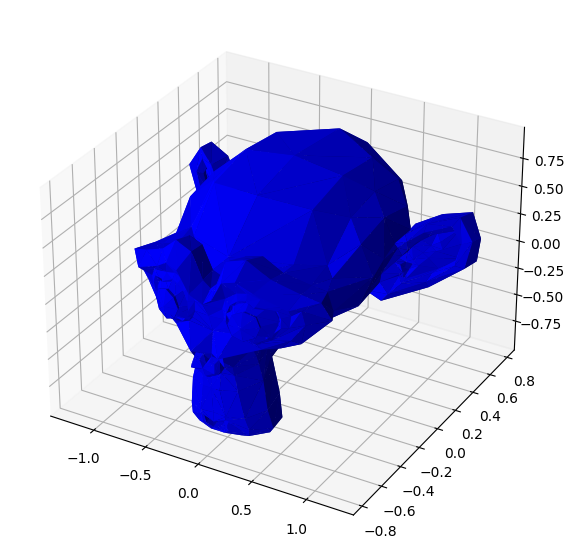

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(2904, 3)

In [ ]:

import trimesh
import numpy as np
import tensorflowjs as tfjs
mesh=trimesh.load('graphics.stl',process=False)
vertices=np.array(mesh.vertices)
faces=np.array(mesh.faces)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mesh = {"vertices": mesh.vertices, "faces": mesh.faces}
plot(vertices,faces)
# Create a new 3D plot
threejs_visualization.triangular_mesh_renderer(mesh, width=400, height=400)
mesh["vertices"].shape

In [ ]:
faces.shape

(968, 3)

In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow_graphics.geometry.transformation import quaternion
from tensorflow_graphics.math import vector
from tensorflow_graphics.notebooks import threejs_visualization
import tensorflowjs as tfjs

#To apply rotation on the graphics we wont be using the Euler angles directly, Instead we will be using quaternions
[link text](https://compsci290-s2016.github.io/CoursePage/Materials/EulerAnglesViz/)
https://compsci290-s2016.github.io/CoursePage/Materials/EulerAnglesViz/
When rotating a mesh in three-dimensional space, using quaternions provides several advantages over Euler angles. Here are a few reasons why quaternions are commonly used for rotations:

Avoiding Gimbal Lock: Euler angles suffer from a problem called "gimbal lock" where the rotation axes align and result in a loss of one degree of freedom. This can cause unexpected behavior and make it difficult to represent certain orientations. Quaternions, on the other hand, do not suffer from gimbal lock, making them a more reliable representation for rotations.

Smooth Interpolation: Quaternions provide smooth interpolation between rotations. Interpolating between two Euler angle rotations directly can result in unexpected twisting or flipping due to the discontinuities in the angle representation. Quaternions, with their four-dimensional nature, allow for seamless interpolation between rotations, producing visually pleasing and predictable results.

Computational Efficiency: Quaternion operations, such as multiplication and normalization, are generally computationally efficient compared to performing multiple matrix operations required for Euler angles. This efficiency is particularly beneficial in real-time applications such as computer graphics and game development.

Numerical Stability: Quaternions are more numerically stable than Euler angles, especially when performing multiple consecutive rotations. Repeated multiplications of quaternions preserve precision and prevent accumulation of numerical errors, whereas successive rotations with Euler angles can introduce increasing inaccuracies.

In summary, quaternions offer advantages such as avoiding gimbal lock, smooth interpolation, computational efficiency, and numerical stability, making them a preferred choice for representing rotations, including rotating meshes in three-dimensional space.





User
what are euler angle
ChatGPT
I apologize for the confusion in my previous response. Euler angles are a set of three angles that describe the orientation of an object or coordinate system in three-dimensional space. They are named after the Swiss mathematician Leonhard Euler, who introduced them in the 18th century.

Euler angles represent rotations around three fixed axes, usually referred to as roll (φ), pitch (θ), and yaw (ψ). The order in which these rotations are applied determines the convention used for defining the Euler angles. There are various Euler angle conventions, including the popular Tait-Bryan convention (also known as XYZ convention), which defines the rotations in the following order:

Rotation around the x-axis (roll): It represents a rotation in the x-axis direction, which causes a tilting or rolling motion.
Rotation around the y-axis (pitch): It represents a rotation in the y-axis direction, which causes an up-and-down or pitching motion.
Rotation around the z-axis (yaw): It represents a rotation in the z-axis direction, which causes a left-or-right or yawing motion.
By applying these three rotations successively, the orientation of an object or coordinate system can be determined.

It's important to note that Euler angles suffer from the problem of gimbal lock, which is a loss of one degree of freedom under certain conditions. This occurs when two of the rotational axes become aligned, causing ambiguity in the representation. To overcome this limitation, alternative representations such as quaternions or rotation matrices are often used, especially in computer graphics, robotics, and other applications where precise and stable rotations are required.





User
how to calculate quaternion from angles
ChatGPT
To calculate a quaternion from Euler angles, you can follow these general steps:

Determine the order of rotations: Decide on the order in which the three Euler angles (roll, pitch, and yaw) are applied. This order will be used to perform the rotations and calculate the quaternion.

Convert Euler angles to rotation matrices: Using the chosen order of rotations, create three separate rotation matrices corresponding to the individual Euler angles. Each rotation matrix represents a rotation around a specific axis.

Multiply the rotation matrices: Multiply the rotation matrices in the order determined by the chosen rotation sequence. This multiplication combines the rotations into a single rotation matrix.

Extract the quaternion from the rotation matrix: Once you have the combined rotation matrix, you can extract the quaternion from it. The specific method to extract the quaternion may depend on the programming or mathematical libraries you are using.

Alternatively, some libraries or programming languages may provide direct functions to convert Euler angles to quaternions, which can simplify the process for you.

It's important to note that the conversion from Euler angles to quaternions involves some trigonometric calculations and matrix operations. Therefore, it's often easier and more convenient to use existing libraries or functions that provide these conversions, as they handle the complexities and ensure accuracy.


In [ ]:
random_angles = np.random.uniform(-np.pi, np.pi,
                                    (1, 3)).astype(np.float32)

#face looking up 45 degree above
random_angles=np.array([[-np.pi/4,np.pi/4,0]]).astype(np.float32)
  # random_quaternion.shape: (num_samples, 4)
random_quaternion = quaternion.from_euler(random_angles)
data=quaternion.rotate(vertices.astype('float32'),random_quaternion)


In [ ]:
random_angles , random_quaternion

(array([[-0.7853982,  0.7853982,  0.       ]], dtype=float32),
 <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
 array([[-0.3535534 ,  0.3535534 ,  0.14644663,  0.85355335]],
       dtype=float32)>)

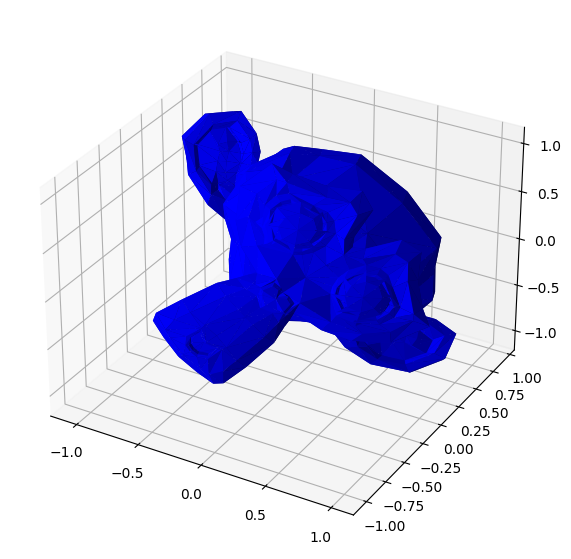

In [ ]:
plot(data,faces)

In [ ]:
#dataset of inverse quaternion
def datagen(samples,orientation='normal'):
    random_angles = np.random.uniform(-np.pi, np.pi,
                                    (samples, 3)).astype(np.float32)
    random_quaternion = quaternion.from_euler(random_angles)
    data=quaternion.rotate(vertices[tf.newaxis,:,:].astype('float32'),random_quaternion[:,tf.newaxis,:])
    quat_inv=quaternion.inverse(random_quaternion)
    rotation=random_quaternion if orientation=='normal' else quat_inv
    yield data,rotation

data=lambda samples,orientation:tf.data.Dataset.from_generator(datagen,args=[samples,orientation],output_signature=(tf.TensorSpec(shape=(None,2904,3), dtype=tf.float32),
                                                                                            tf.TensorSpec(shape=(None,4), dtype=tf.float32)))
next(iter(data(samples=32,orientation='inverse')))[0].shape

TensorShape([32, 2904, 3])

In [ ]:
print(vertices.shape)
def create_model():
    model=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(2904,3)),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(4)
    ])
    return model
model_normal=create_model()
model_inv=create_model()
model_normal.compile(loss='MSE',optimizer='adam',metrics=['MSE'])
model_normal(vertices[tf.newaxis,...])

(2904, 3)


<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.03323176,  0.45696655,  0.32424065,  0.14551347]],
      dtype=float32)>

In [ ]:
model.fit(data(samples=1000),epochs=2000,verbose=1)

In [ ]:
model.evaluate(datagen(2))

In [ ]:
m=tf.keras.metrics.R2Score()
m(tf.constant([[2.4],[3.4]]),tf.constant([[2.4],[3.4]]))

tf.Tensor([[-0.0126488   0.00292021  0.00517323  0.00086206]], shape=(1, 4), dtype=float32)


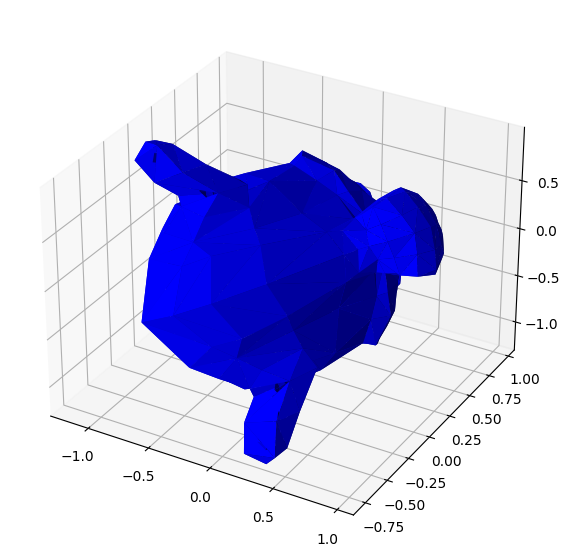

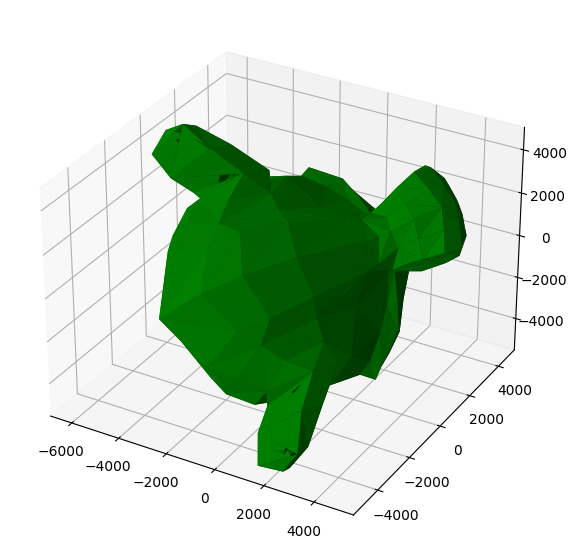

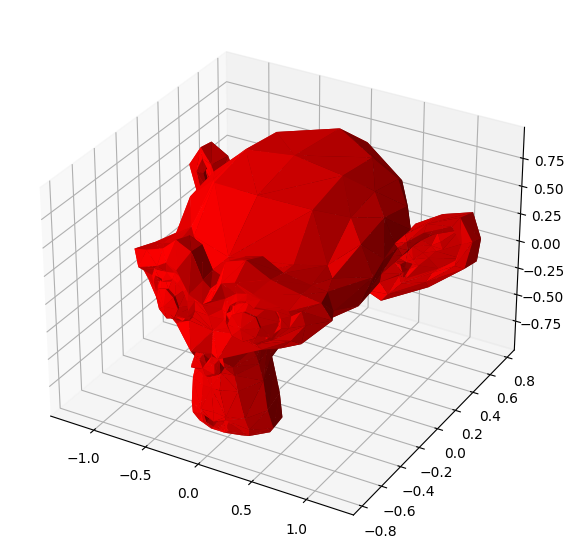

[[64.5263824 -14.89709 -26.3906441 4.39768648]] [[0.882088304 -0.197555155 -0.421336621 -0.0732634068]]
1/1 [==============================] - 0s 37ms/step - loss: 0.0213


In [ ]:

def single_test():
    x,y=iter(next(datagen(1)))
    prediction=model_normal(x)
    modified_x=quaternion.rotate(vertices[tf.newaxis,:,:].astype('float32'),prediction[:,tf.newaxis,:])
    quat_inv=quaternion.inverse(prediction)
    print(quat_inv)
    orig=quaternion.rotate(modified_x,quat_inv[:,tf.newaxis,:])
    plot(x[0],faces)
    plot(modified_x[0],faces,'green')
    plot(orig[0],faces,'red')
    tf.print(prediction,y)
    model_normal.evaluate(x,y)
single_test()

In [ ]:
@tf.function
def quaternion_distance(q1, q2):
    dot_product = tf.reduce_sum(q1 * q2, axis=-1)
    quaternion_norms = tf.reduce_sum(q1**2, axis=-1) * tf.reduce_sum(q2**2, axis=-1)
    distance = 1 - tf.abs(dot_product)**2 / quaternion_norms
    return distance

In [ ]:
cb=tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min',patience=20)
model_normal.compile(loss=quaternion_distance,optimizer='adam')


In [ ]:
model_normal.fit(data(samples=1000,orientation='normal'),epochs=2000,verbose=1)

In [ ]:
tfjs.converters.save_keras_model(model_normal,'./')

In [ ]:
model=tf.keras.models.load_model('model.h5')
model.summary()

ValueError: ignored

tf.Tensor([[ 0.00152087  0.00343538 -0.00037914  0.00157617]], shape=(1, 4), dtype=float32)


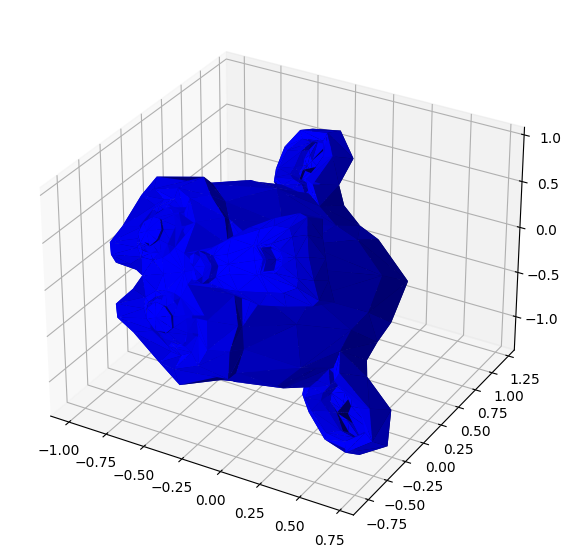

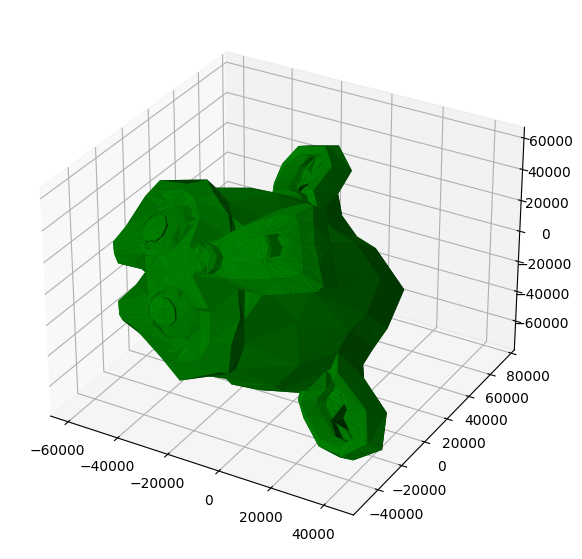

[[-90.8361435 -205.183731 22.6450272 94.1394119]] [[-0.34973067 -0.839818716 0.0513256937 0.412017673]]
1/1 [==============================] - 0s 39ms/step - loss: 0.0029


In [ ]:
single_test()